# **CO543-Image Processing-Lab 02**

E/20/037

## 1. Image thresholding


Image thresholding is a way of partitioning an image into a foreground and background.

Image Thresholding is an **intensity transformation function** in which the values of pixels **below a particular threshold are reduced**, and the values **above that threshold are boosted**.  This generally results in a **bilevel image** at the end, where the image is composed of **black and white pixels**. Thresholding belongs to the family of **point-processing techniques**.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


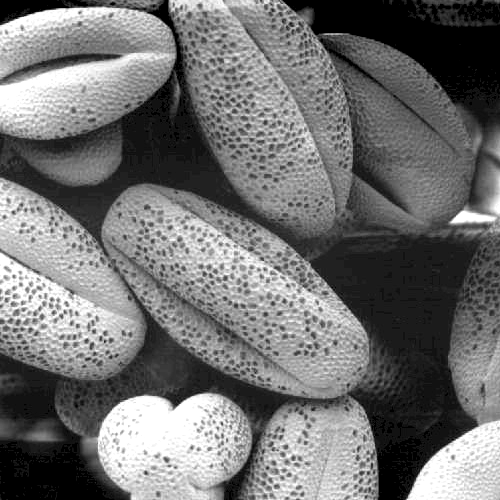

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

path='/content/drive/MyDrive/semester-5/CO543-Labs/lab2/resources/'

# Loading the image
img = cv2.imread(path+"high_contrast.tif", 0)

cv2_imshow(img)

### Binary Thresholding

The function takes in argument a **source image**, **threshold** at which the cutoff has to take place, **maximum intensity value** represented by the color space, the **mode of thresholding** and returns an **integer value** (denoting result of the operation) and an **image object** containing the resultant image after the processing.

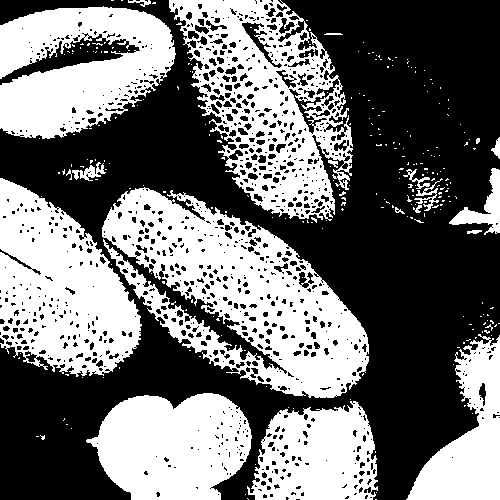

127.0


In [ ]:
# Thresholding the image placing 127 intensity level as threshold
# Pixel values below 127 would be changed to Black
# Pixel values above 127 would be changed to White (255)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Displaying the output image
cv2_imshow(thresh)
print(ret)

### ⚒️`Lab Task 01`
>Write a **function** to perform **image thresholding** using **point processing** taking the **image file** and the **threshold value** from the user.

In [ ]:
def imageThreshold(img, thresholdValue, method):
  match method:
    case "binary":
      ret, thresh = cv2.threshold(img, thresholdValue, 255, cv2.THRESH_BINARY)
      return thresh
    case "binary-inverse":
      ret, thresh = cv2.threshold(img, thresholdValue, 255, cv2.THRESH_BINARY_INV)
      return thresh
    case "truncate":
      ret, thresh = cv2.threshold(img, thresholdValue, 255, cv2.THRESH_TRUNC)
      return thresh
    case "zero":
      ret, thresh = cv2.threshold(img, thresholdValue, 255, cv2.THRESH_TOZERO)
      return thresh
    case "inverse-to-zero":
      ret, thresh = cv2.threshold(img, thresholdValue, 255, cv2.THRESH_TOZERO_INV)
      return thresh



In [ ]:
import matplotlib.pyplot as plt

img = cv2.imread(path+"high_contrast.tif", 0)
# plt.imshow(img)

thresholdValues = [50, 100, 150, 200]
plotCount = len(thresholdValues)

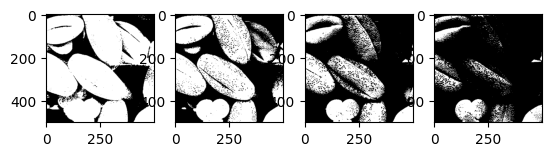

In [ ]:
for i in range(plotCount):
  plt.subplot(1, plotCount, i+1)
  plt.imshow(imageThreshold(img, thresholdValues[i], "binary"), cmap='gray')

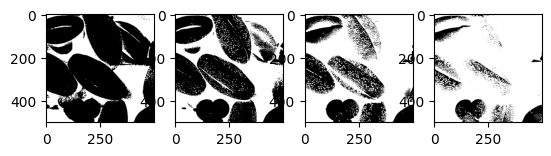

In [ ]:
for i in range(plotCount):
  plt.subplot(1, plotCount, i+1)
  plt.imshow(imageThreshold(img, thresholdValues[i], "binary-inverse"), cmap='gray')

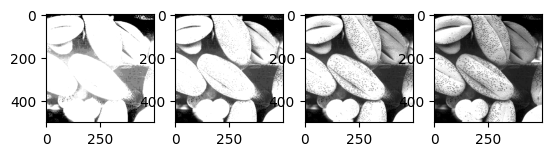

In [ ]:
for i in range(plotCount):
  plt.subplot(1, plotCount, i+1)
  plt.imshow(imageThreshold(img, thresholdValues[i], "truncate"), cmap='gray')

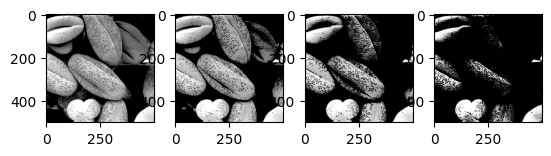

In [ ]:
for i in range(plotCount):
  plt.subplot(1, plotCount, i+1)
  plt.imshow(imageThreshold(img, thresholdValues[i], "zero"), cmap='gray')

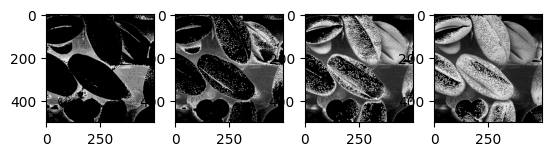

In [ ]:
for i in range(plotCount):
  plt.subplot(1, plotCount, i+1)
  plt.imshow(imageThreshold(img, thresholdValues[i], "inverse-to-zero"), cmap='gray')

## 2. Image arithmetic operations

Basic arithmetic operations like addition, subtraction, division, multiplication can be
performed quickly and easily on image pixels for a variety of effects and applications.
These operations are carried out between corresponding pixel pairs of two images of the
**same size**.

Read two images and perform addition and subtraction.

### ⚒️`Lab Task 02`
>Read two images and perform addition and subtraction.

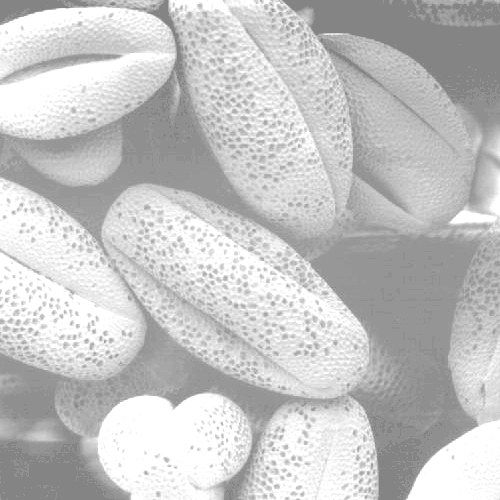

In [ ]:
imgBright = cv2.imread(path+"bright.tif", 0)
cv2_imshow(imgBright)

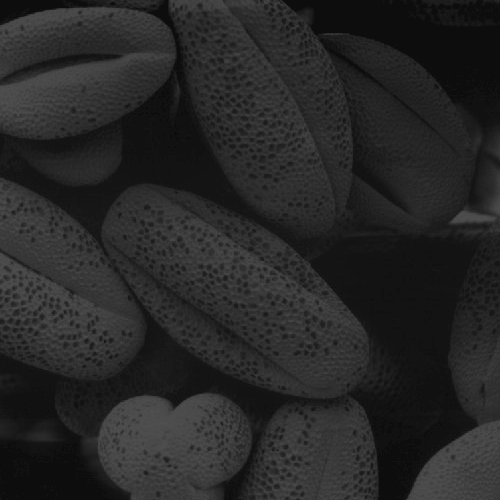

In [ ]:
imgDark = cv2.imread(path+"dark.tif", 0)
cv2_imshow(imgDark)

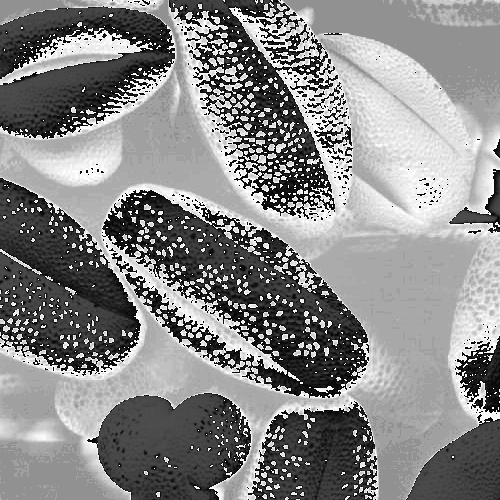

In [ ]:
res = imgBright + imgDark
# res = cv2.add(imgBright, imgDark)
cv2_imshow(res)

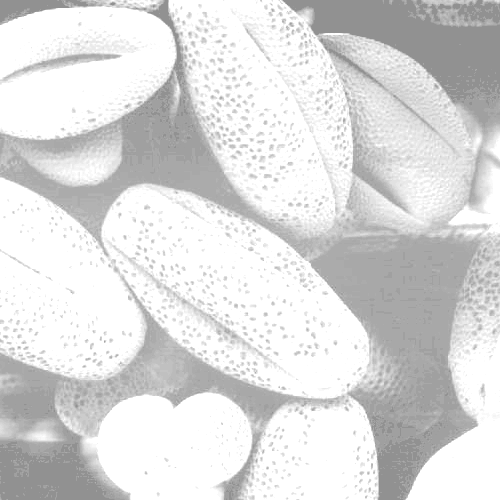

In [ ]:
# Addition using inbuilt functions

res = cv2.add(imgBright, imgDark)
cv2_imshow(res)


💡Why are they different?

`imgBright + imgDark`
If a pixel value in imgBright is 250 and in imgDark is 20, the sum will be 250 + 20 = 270, but since 270 is greater than 255, it wraps around and results in 270 - 256 = 14.

`cv2.add(imgBright, imgDark)`
if a pixel value in imgBright is 250 and in imgDark is 20, the sum would normally be 270, but cv2.add() will clip this to 255.

In [ ]:
# Create two grayscale images with single pixel values
image1 = np.full((1, 1), 250, dtype=np.uint8)
image2 = np.full((1, 1), 20, dtype=np.uint8)

# Add the two images
result1 = image1+image2
result2 = cv2.add(image1, image2)

# Display the result
print(result1)
print(result2)

[[14]]
[[255]]


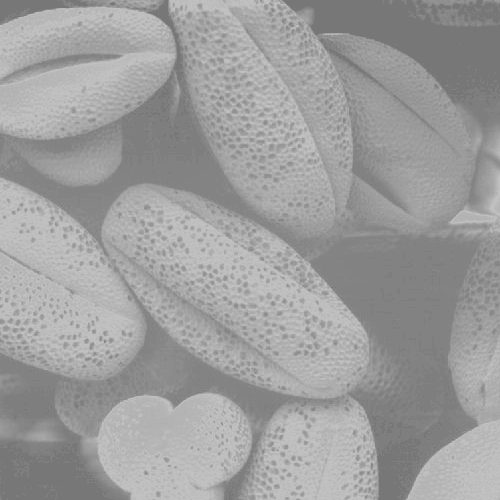

In [ ]:
res = imgBright - imgDark
cv2_imshow(res)

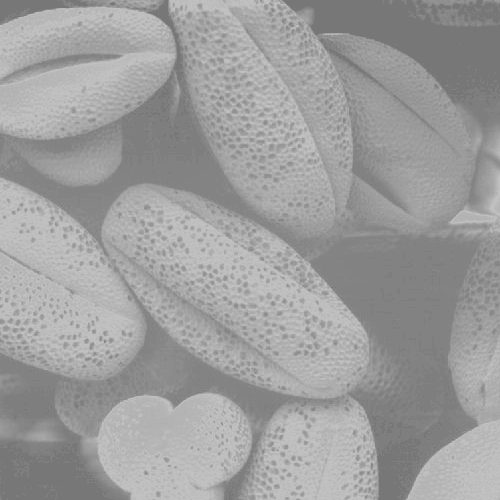

In [ ]:
res = cv2.subtract(imgBright, imgDark)
cv2_imshow(res)

## 3. Spatial Processing




### ⚒️`Lab Task 03`

>1. Write simple programs to demonstrate the following. Show the original and
resultant images in the same figure to compare them easily.
- Log transformation
- Power transformation
- Contrast Stretching
- Gray level slicing
- Bit plane slicing

#### Log Transformation

$s=c.log(1+r)$

$c=\frac{255}{log(1+r_{max})}$

In [ ]:
def showResult(original, result):
  # concatenate the original and the result
  final = cv2.hconcat((original, result))
  cv2_imshow(final)

In [ ]:
# Log transformation

def logTransformation(img):
  # Apply log transformation
  c = 255 / np.log(1 + np.max(img))
  log_img = c * np.log(1 + img)

  # Clip the values to be in the range [0, 255] and convert to uint8
  log_img = np.clip(log_img, 0, 255).astype(np.uint8)

  return log_img

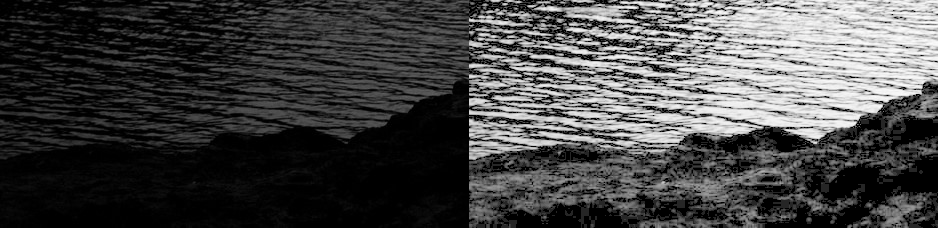

In [ ]:
img_dark_lake = cv2.imread(path+'dark-man.jpg', 0)
showResult(img_dark_lake, logTransformation(img_dark_lake))

#### Power Transformation

$s=cr^{\gamma}$

In [ ]:
def powerTransformation(img, gamma):

  lookUpTable = np.empty((256,), np.uint8)

  for i in range(256):
    lookUpTable[i] = np.clip(pow(i / 255.0, gamma) * 255, 0, 255)
    # pow(i / 255.0, gamma): This takes the current pixel value i (ranging from 0 to 255) and normalizes it by dividing by 255 to get it in the range [0, 1]. Then, it applies the power transformation with exponent 𝛾
    # * 255: After applying the gamma function, we multiply by 255 to scale the result back to the range of [0, 255].

  # print(lookUpTable)

  plt.figure(figsize=(5,3))
  plt.plot(np.arange(0, 256), lookUpTable, c='b')
  plt.xlabel('Input intensity')
  plt.ylabel('Output intensity')
  plt.grid(True)
  plt.show()

  return cv2.LUT(img, lookUpTable)

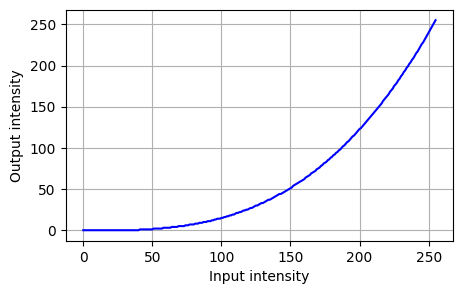

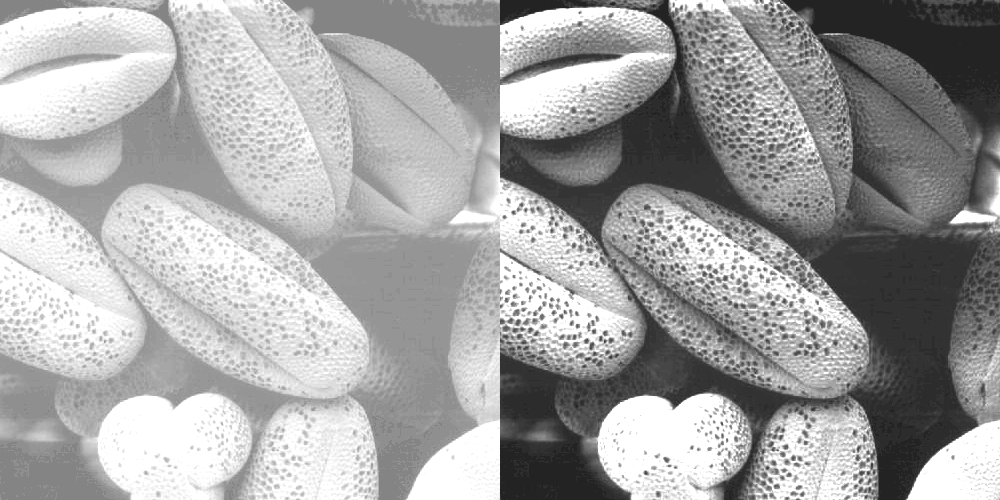

In [ ]:
gamma = 3
bright = cv2.imread(path+'bright.tif', 0)
showResult(bright, powerTransformation(bright, gamma))

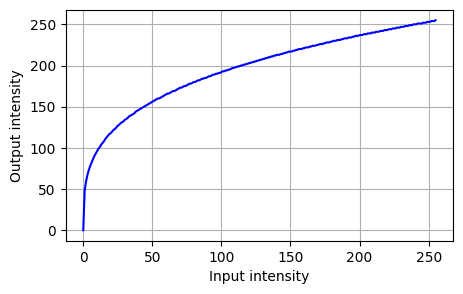

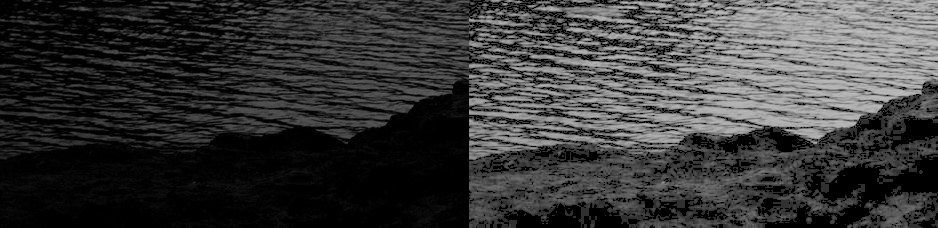

In [ ]:
showResult(img_dark_lake, powerTransformation(img_dark_lake, 0.3))

#### 3. Contrast stretching

$s=\frac{255}{H-L}(r-L)$

In [ ]:
def contrastStretching(img):
    # Find the minimum and maximum intensity values in the image
    min_val = np.min(img)
    max_val = np.max(img)

    # Apply the contrast stretching formula
    stretched_img = 255*((img - min_val) / (max_val - min_val))
    stretched_img = np.clip(stretched_img, 0, 255).astype(np.uint8)

    # Plot the transformation function
    plt.figure(figsize=(5, 3))
    plt.plot([0, min_val, max_val, 255], [0, 0, 255, 255], c='r')
    plt.xlabel('Input intensity')
    plt.ylabel('Output intensity')
    plt.grid(True)
    plt.title('Contrast Stretching Transformation')
    plt.show()

    return stretched_img

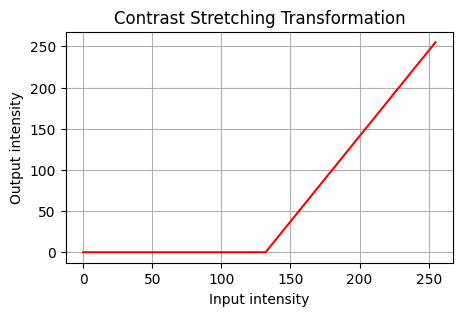

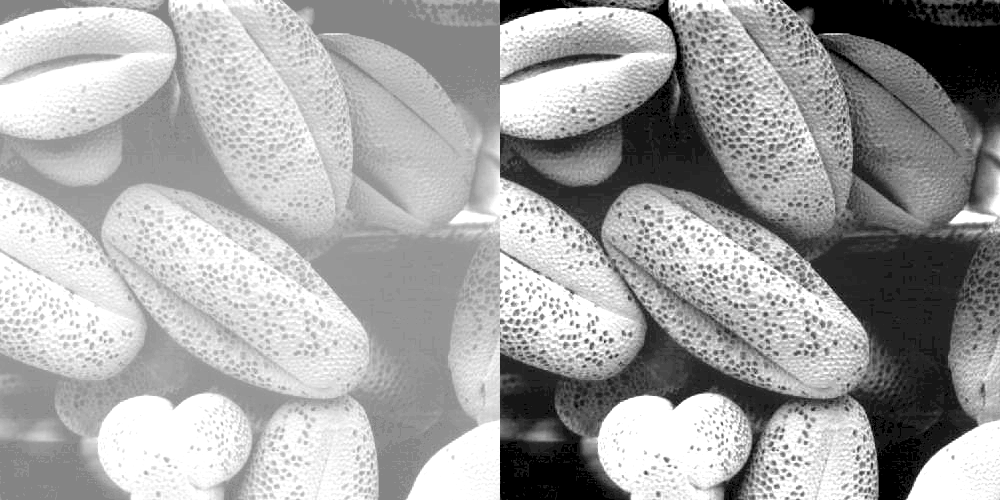

In [ ]:
bright = cv2.imread(path+'bright.tif', 0)
showResult(bright, contrastStretching(bright))

#### 4. Gray level slicing

In [ ]:
def grayLevelSlicingHighlightAndSuppress(img, lower_range, upper_range, highlight_value=255, suppress_value=0):
    """
    Performs Gray Level Slicing.
    The selected intensity levels are highlighted to the highlight_value while the rest is suppressed to the suppress_value.

    Parameters:
    img (numpy array): Input grayscale image
    lower_range (int): Lower bound of the range to be enhanced
    upper_range (int): Upper bound of the range to be enhanced
    highlight_value (int): Value to assign for intensities within the range (default 255)
    suppress_value (int): Value to assign for intensities outside the range (default 0)

    Returns:
    numpy array: Gray Level Sliced image
    """
    # Create an empty image to store the result
    sliced_img = np.full(img.shape, suppress_value, dtype=np.uint8)

    # Apply slicing
    mask = (img >= lower_range) & (img <= upper_range) # binary mask to identify pixels within the specified range
    sliced_img[mask] = highlight_value

    # Plot the transformation function
    plt.figure(figsize=(5, 3))
    plt.plot(
        [0, lower_range, lower_range, upper_range, upper_range, 255],
        [suppress_value, suppress_value, highlight_value, highlight_value, suppress_value, suppress_value],
        c='g'
    )
    plt.xlabel('Input intensity')
    plt.ylabel('Output intensity')
    plt.title('Gray Level Slicing Transformation')
    plt.grid(True)
    plt.show()

    return sliced_img

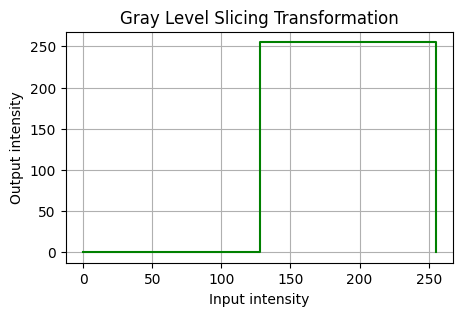

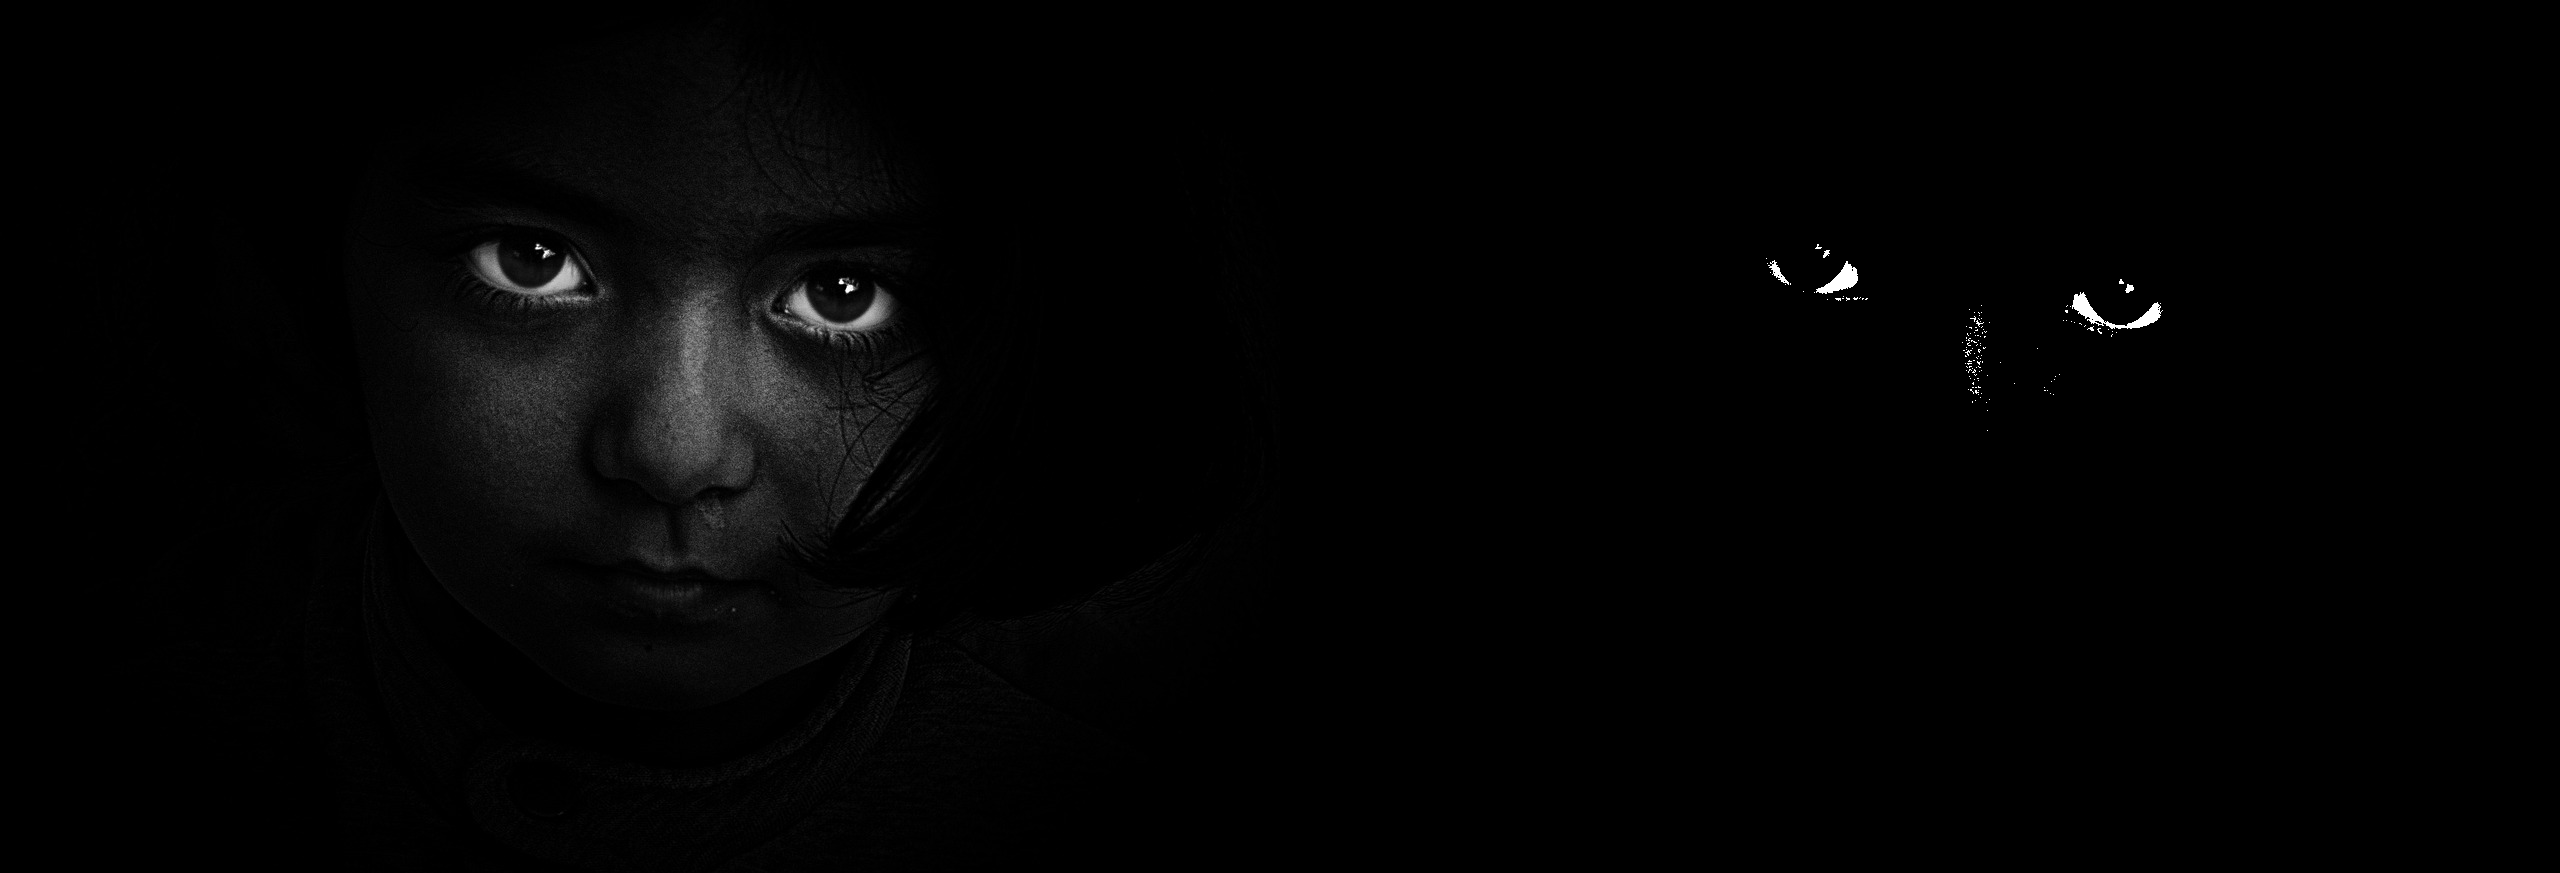

In [ ]:
kidImg = cv2.imread(path+'kid.jpg', 0)
showResult(kidImg, grayLevelSlicingHighlightAndSuppress(kidImg, 128, 255, 255, 0))

In above example, the eyes(pixels in high intensity range) are highligted while the rest is suppressed.

In [ ]:
def grayLevelSlicingHighlightAndLeave(img, lower_range, upper_range, highlight_value=255):
    """
    Performs Gray Level Slicing.
    The selected intensity levels are highlighted to the highlight_value while the rest remains unchanged.

    Parameters:
    img (numpy array): Input grayscale image
    lower_range (int): Lower bound of the range to be enhanced
    upper_range (int): Upper bound of the range to be enhanced
    highlight_value (int): Value to assign for intensities within the range (default 255)
    suppress_value (int): Value to assign for intensities outside the range (default 0)

    Returns:
    numpy array: Gray Level Sliced image
    """
    # Create an empty image to store the result
    # sliced_img = np.full(img.shape, suppress_value, dtype=np.uint8)
    sliced_img = img.copy()

    # Apply slicing
    mask = (img >= lower_range) & (img <= upper_range) # binary mask to identify pixels within the specified range
    sliced_img[mask] = highlight_value

    # Plot the transformation function
    plt.figure(figsize=(5, 3))
    plt.plot(
        [0, lower_range, lower_range, upper_range, upper_range, 255],
        [0, lower_range, highlight_value, highlight_value, upper_range, 255],
        c='g'
    )
    plt.xlabel('Input intensity')
    plt.ylabel('Output intensity')
    plt.title('Gray Level Slicing Transformation')
    plt.grid(True)
    plt.show()

    return sliced_img

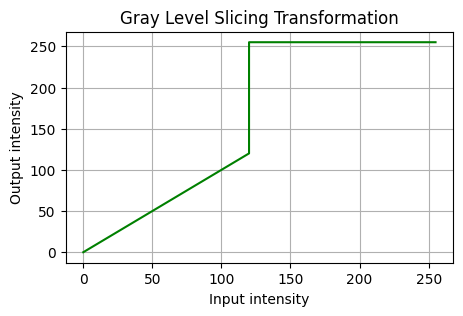

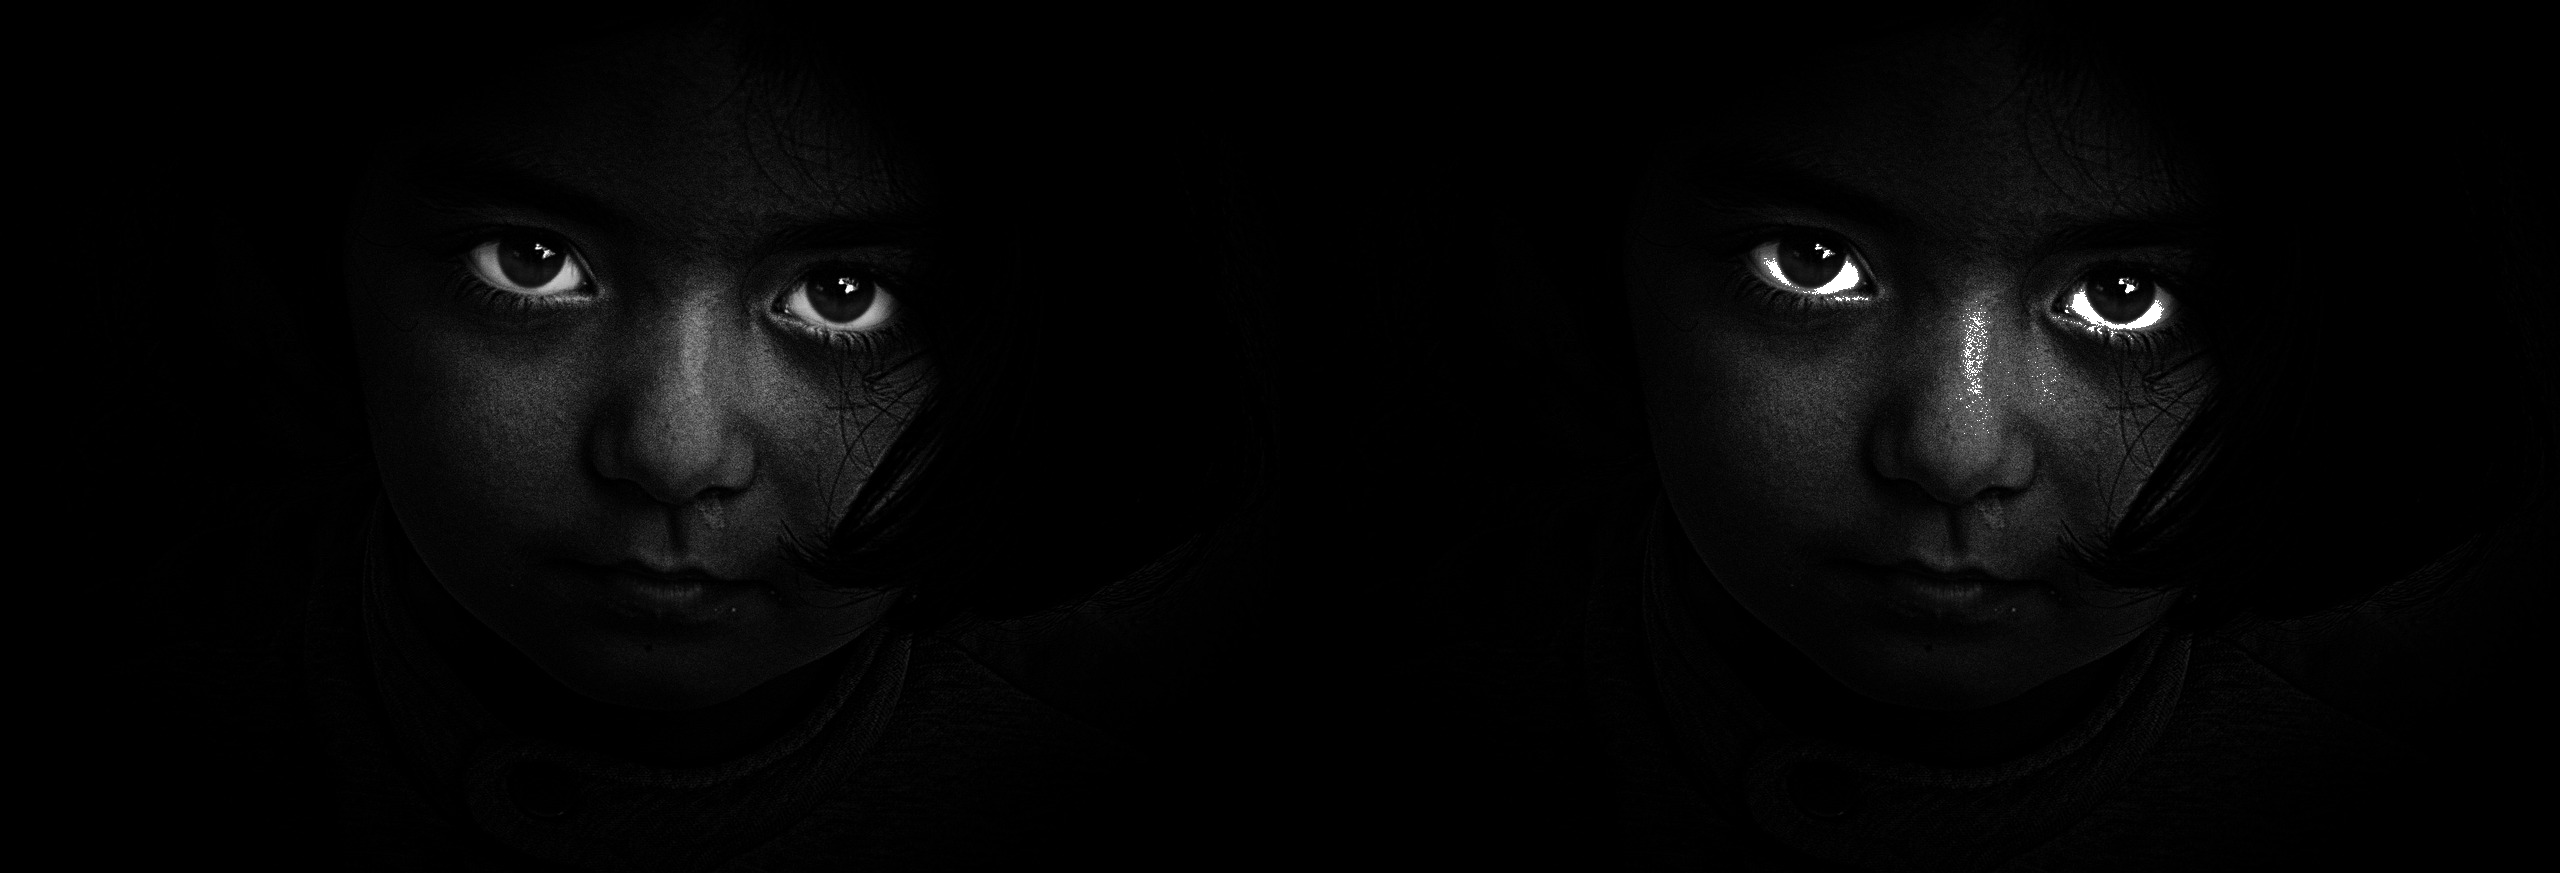

In [ ]:
kidImg = cv2.imread(path+'kid.jpg', 0)
showResult(kidImg, grayLevelSlicingHighlightAndLeave(kidImg, 120, 255, 255))

In above example, the eyes(values in high intensity range) are highligted while the rest remains unchanged.

#### 4. Bit plane slicing

In [ ]:
def bitPlaneSlicing(img):
  bitPlanes = []

  for i in range(8):
    # Extract and isolate ith bit of each pixel
    bitPlane = (img >> i) & 1
    bitPlanes.append(bitPlane)

  return bitPlanes

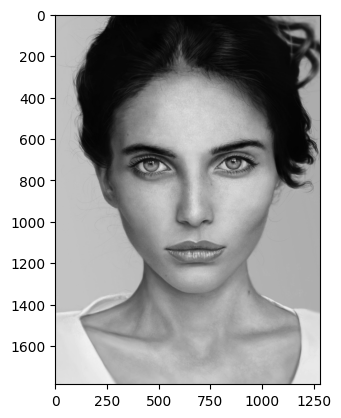

In [ ]:
portrait = cv2.imread(path+'portrait.jpg', 0)
plt.imshow(portrait, cmap='gray')
bitPlanes = bitPlaneSlicing(portrait)

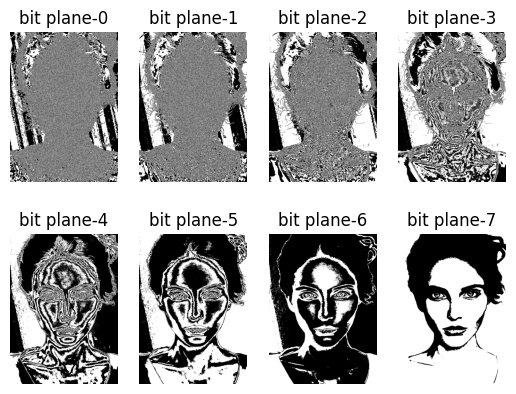

In [ ]:
for i in range(8):
  plt.subplot(2, 4, i+1)
  plt.imshow(bitPlanes[i], cmap='gray')
  plt.title(f"bit plane-{i}")
  plt.axis('off')


(-0.5, 1279.5, 1784.5, -0.5)

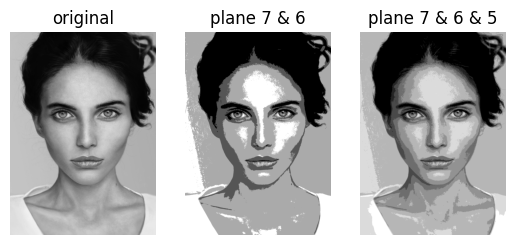

In [ ]:
# bit plane reconstructing

plt.subplot(1, 3, 1)
plt.imshow(portrait, cmap='gray')
plt.title("original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow((bitPlanes[7]<<7)+(bitPlanes[6]<<6), cmap='gray')
plt.title("plane 7 & 6")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow((bitPlanes[7]<<7)+(bitPlanes[6]<<6)+(bitPlanes[5]<<5), cmap='gray')
plt.title("plane 7 & 6 & 5")
plt.axis('off')


2. Consider the graph for a typical transformation function used for Contrast
 Stretching in the given figure and determine the behavior of the function with
 respect to given changes.


  a. When r1 =s1 and r2=s2

  >The output intensity is identical to the input intensity. Therefore, no change occurs.


  b. When r1=r2, s1=0 and s2=L-1

  >This is equivalent to thresholding at r1. All the intensity levels less than r1 will be suppressed to 0 and the rest will be highlighted to L-1

## 4. Masking

### ⚒️`Lab Task 04`

>Write a program toreadanyimage, resize it to 256x256. Apply the
 masks shown in following figures so that only the middle part of the image is
 visible

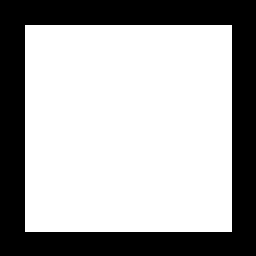

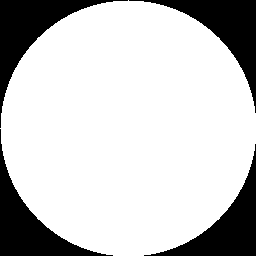

In [ ]:
# creating a square of zeros using a variable
rectangle = np.zeros((256, 256), dtype="uint8")
cv2.rectangle(rectangle, (25, 25), (256-25, 256-25), 255, -1)
cv2_imshow(rectangle)

# creating a circle of zeros using a variable
circle = np.zeros((256, 256), dtype="uint8")
cv2.circle(circle, (128, 128), 128, 255, -1)
cv2_imshow(circle)

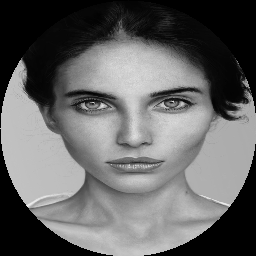

In [ ]:
portrait = cv2.imread(path+'portrait.jpg', 0)
portrait = cv2.resize(portrait, (256, 256))

cv2_imshow(cv2.bitwise_and(portrait, circle))

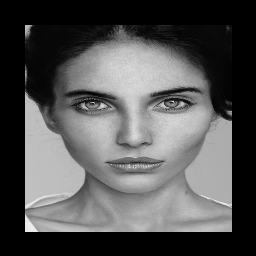

In [ ]:
cv2_imshow(cv2.bitwise_and(portrait, rectangle))

## 5. Brightness



### ⚒️`Lab Task 05`

>Write your own Python OpenCV function addbrightness() and use
 it to increase brightness of a given image.(Hint: Use Image arithmetic operations)

In [ ]:
def addBrightness(img, amount):
  # convert the data type to detect overflows
  tempImg = img.astype(np.int32)

  # add the provided intensity
  tempImg += amount

  # clip the overflows
  final = np.clip(tempImg, 0, 255).astype(np.uint8)

  return final

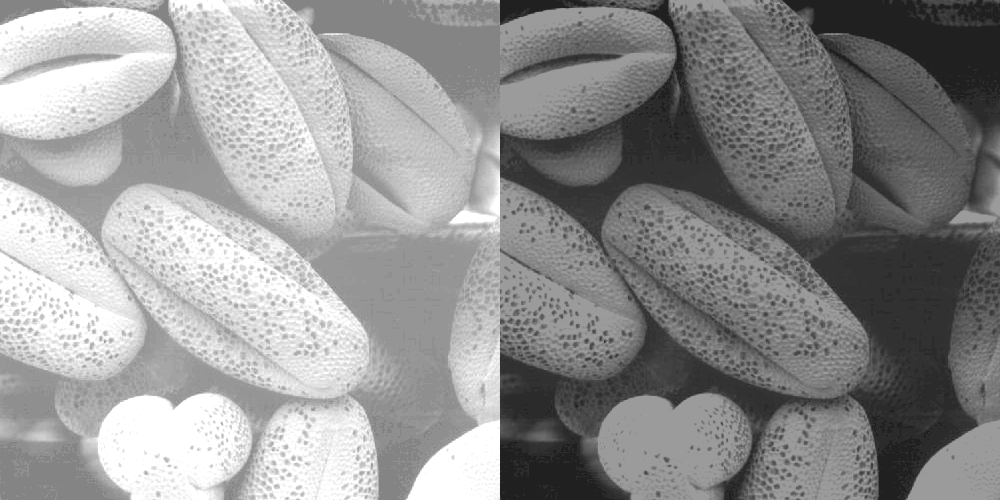

In [ ]:
bright = cv2.imread(path+'bright.tif', 0)
corrected = addBrightness(bright, -100)

showResult(bright, corrected)

## 6. Histogram Processing


 In an image processing context, the histogram of an image normally refers to a
 **histogram of the pixel intensity values**. This histogram is a graph showing the **number of pixels** in an image at **each different intensity value** found in that image.
 It shows how many times a particular gray level(intensity) appears in an image.

### ⚒️`Lab Task 06`

>1. Use inbuilt OpenCV cv2.calcHist() function to display the histogram of a given
 image.

In [ ]:
def showHistogram(img):
  # cv2.calcHist(images, channels, mask, histSize, ranges)
  hist = cv2.calcHist([img], [0], None, [256], [0, 256])

  plt.figure(figsize=(10, 3))

  plt.subplot(1,2,1)
  plt.imshow(img, cmap='gray',vmin=0, vmax=255)
  plt.title('image')
  plt.axis('off')

  # Plot the histogram
  plt.subplot(1,2,2)
  plt.plot(hist, color='black')
  plt.title("Grayscale Image Histogram")
  plt.xlabel("Pixel Intensity")
  plt.ylabel("Number of Pixels")
  plt.grid(True)



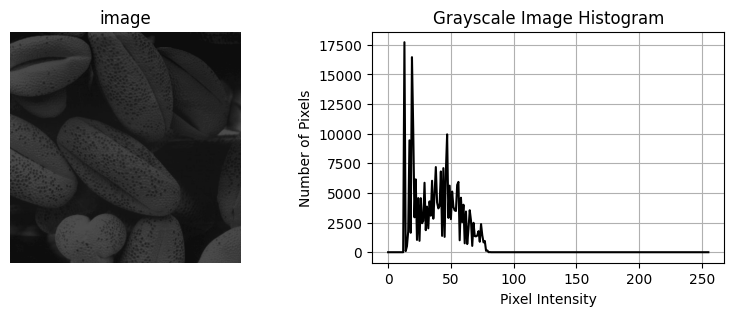

In [ ]:
dark = cv2.imread(path+'dark.tif', 0)
showHistogram(dark)

>2. Use inbuilt numpy np.histogram() function to display the histogram of a given
 image.

In [ ]:
def showHistogramNp(img):
  # Calculate histogram using np.histogram
  hist, bins = np.histogram(img.ravel(), bins=256, range=[0, 256])

  plt.figure(figsize=(10, 3))

  plt.subplot(1,2,1)
  plt.imshow(img, cmap='gray',vmin=0, vmax=255)
  plt.title('image')
  plt.axis('off')

  # Plot the histogram
  plt.subplot(1,2,2)
  plt.plot(bins[:-1], hist, color='blue')  # bins[:-1] to align with hist
  plt.title("Grayscale Image Histogram using np.histogram")
  plt.xlabel("Pixel Intensity")
  plt.ylabel("Number of Pixels")
  plt.grid(True)

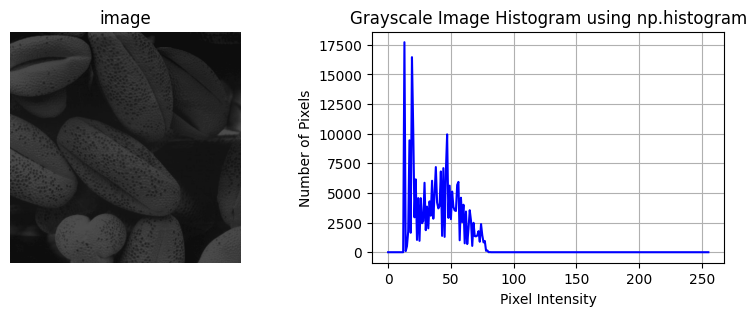

In [ ]:
showHistogramNp(dark)

 >3. Then write your own histogram functions for the following scenarios

* Show a histogram plot for a grayscale image.
* Show three histograms for a given RGB image.

In [ ]:
def myGrayScaleHistogram(img, size=256):
  bins = np.arange(0, size, 1)
  hist = np.zeros(size)

  # find the frequency of each intensity value
  for i in img.ravel():
    hist[i]+=1

  return bins, hist

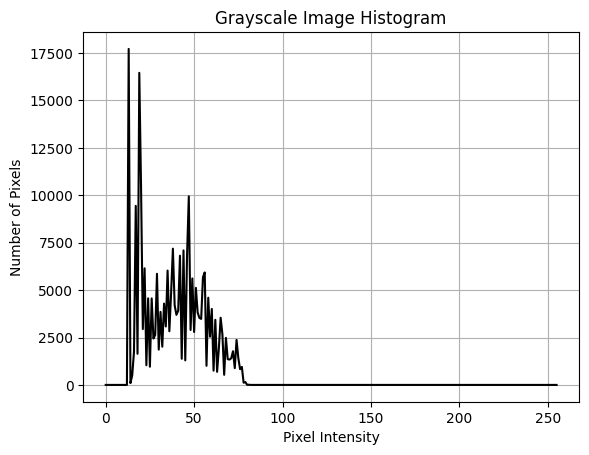

In [ ]:
img = cv2.imread(path+'dark.tif', 0)

bins, hist = myGrayScaleHistogram(img, 256)

# Plot the histogram
plt.plot(bins, hist, color='black')
plt.title("Grayscale Image Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Number of Pixels")
plt.grid(True)

In [ ]:
# RGB Histogram
def myRGBHistogram(img, size=256):
    """
    Compute histograms for each color channel of an RGB image.
    :param img: Input RGB image.
    :param size: Number of bins (default is 256 for intensity values 0-255).
    :return: Tuple of (bins, histograms for R, G, B channels).
    """
    if len(img.shape) != 3 or img.shape[2] != 3:
        raise ValueError("Input image must be an RGB image.")

    # Separate channels
    red_channel = img[:, :, 2]  # OpenCV uses BGR format
    green_channel = img[:, :, 1]
    blue_channel = img[:, :, 0]

    # Compute histograms for each channel
    hist_r = np.bincount(red_channel.ravel(), minlength=size)
    hist_g = np.bincount(green_channel.ravel(), minlength=size)
    hist_b = np.bincount(blue_channel.ravel(), minlength=size)

    # Create bins
    bins = np.arange(size)

    return bins, hist_r, hist_g, hist_b


def plotHelper(x, y, color):
  plt.plot(x, y, color = color)
  plt.title(f"Histogram-{color} channel")
  plt.xlabel("Pixel Intensity")
  plt.ylabel("Number of Pixels")
  plt.grid(True)
  # plt.show()

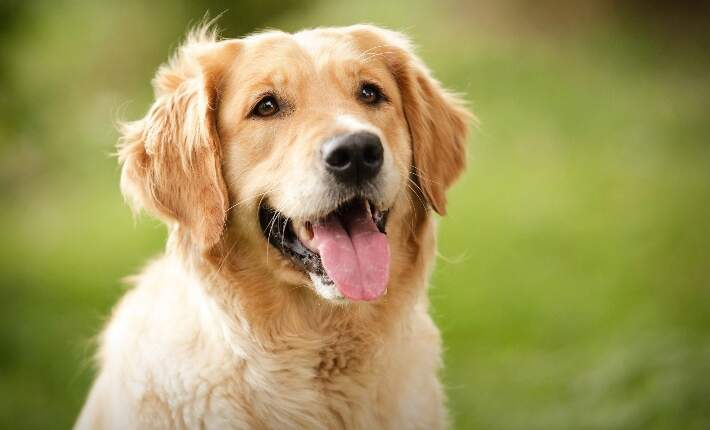

In [ ]:
img = cv2.imread(path+'dog.jpg', cv2.IMREAD_COLOR)
cv2_imshow(img)
bins, hist_r, hist_g, hist_b = myRGBHistogram(img, 256)

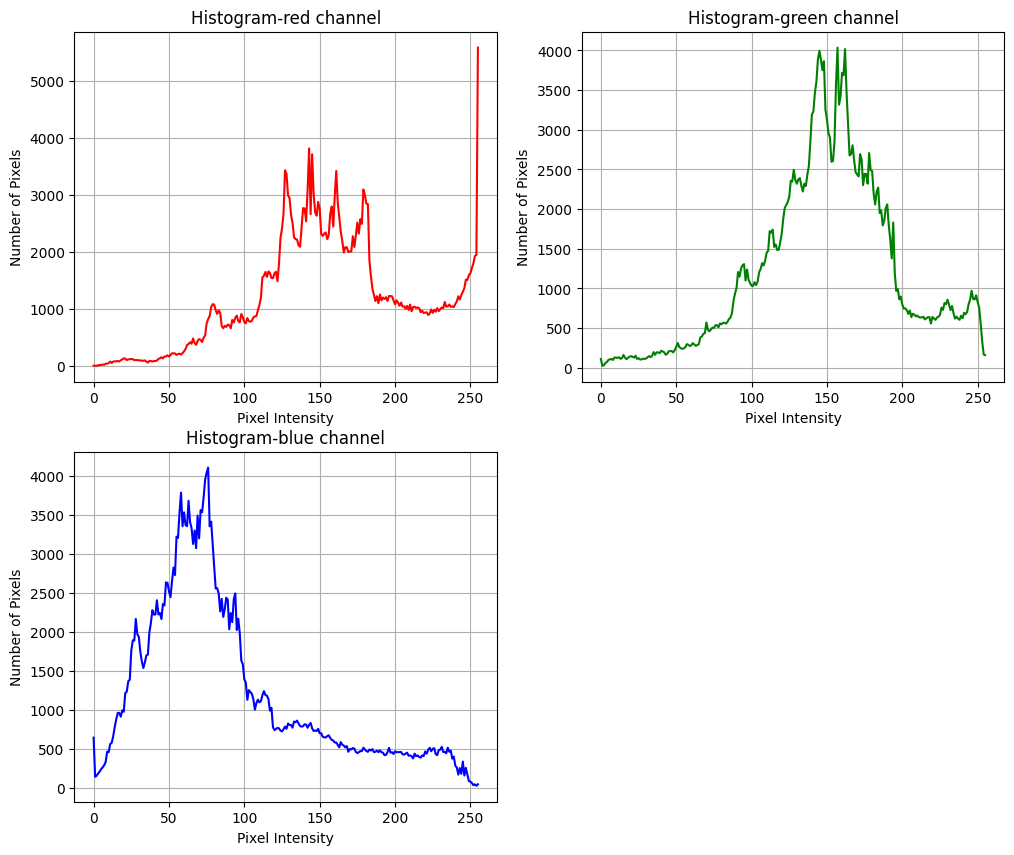

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
plotHelper(bins, hist_r, 'red')

plt.subplot(2,2,2)
plotHelper(bins, hist_g, 'green')


plt.subplot(2,2,3)
plotHelper(bins, hist_b, 'blue')

In [ ]:
img = np.array([[4,4,4,4,4],[3,4,5,4,3],[3,5,5,5,3],[3,4,5,4,3],[4,4,4,4,4]], dtype=np.uint8)
bins,hist = myGrayScaleHistogram(img, 8)
hist

array([ 0.,  0.,  0.,  6., 14.,  5.,  0.,  0.])

In [ ]:
pdf = hist/img.size
cdf = pdf.cumsum()
print(pdf)
print(cdf)

[0.   0.   0.   0.24 0.56 0.2  0.   0.  ]
[0.   0.   0.   0.24 0.8  1.   1.   1.  ]


In [ ]:
(7*cdf)

array([0.  , 0.  , 0.  , 1.68, 5.6 , 7.  , 7.  , 7.  ])

In [ ]:
table = np.round(7*cdf).astype(np.uint8)
table

array([0, 0, 0, 2, 6, 7, 7, 7], dtype=uint8)

4. Consider the four images given in the resources folder. Plot the histogram for each
 image. Perform Histogram Equalization on each image and plot the histograms of
 the resultant images. Comment on the results you have obtained.

In [ ]:
def myHistogramEqualizer(img, size):
  # get the histogram
  bins,hist = myGrayScaleHistogram(img, size)
  # find the probability density function
  pdf = hist/img.size
  # find the cumulative distribution function
  cdf = pdf.cumsum()
  # normalize it and form the lookup table
  table = np.round((size-1)*cdf).astype(np.uint8)

  # perform lookup transformation
  # the intensity values in img should be replaced by the corresponding values in the table
  result = table[img]

  return result

In [ ]:
dark = cv2.imread(path+'dark.tif', 0)
bright = cv2.imread(path+'bright.tif', 0)
lowContrast = cv2.imread(path+'low_contrast.tif', 0)
highContrast = cv2.imread(path+'high_contrast.tif', 0)

Dark Image

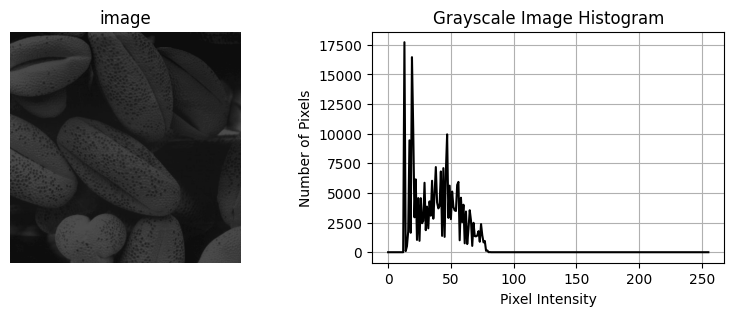

In [ ]:
# DARK IMAGE - before
showHistogram(dark)

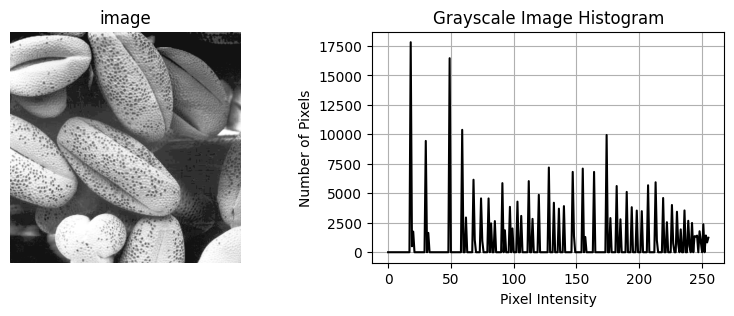

In [ ]:
# DARK IMAGE - after
showHistogram(myHistogramEqualizer(dark,256))

Bright image

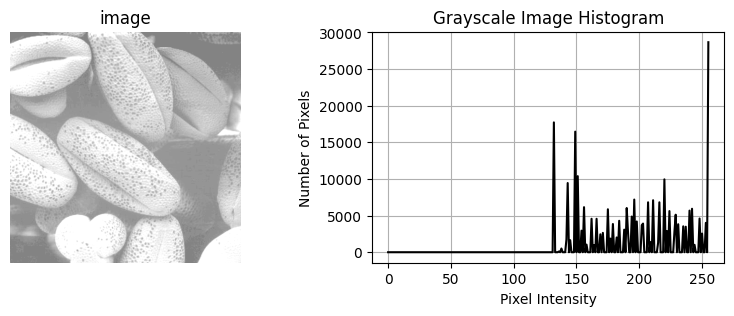

In [ ]:
# BRIGHT IMAGE - before
showHistogram(bright)

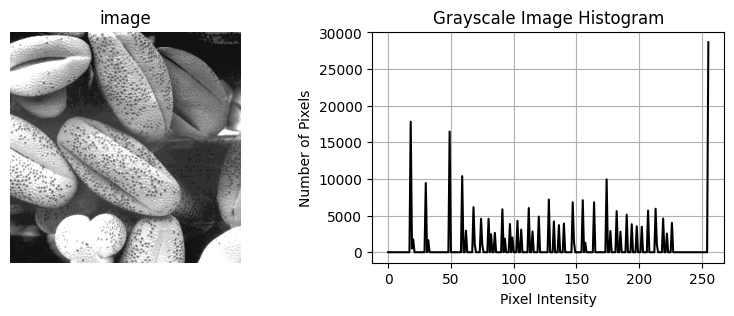

In [ ]:
# BRIGHT IMAGE - after
showHistogram(myHistogramEqualizer(bright,256))

Low contrast

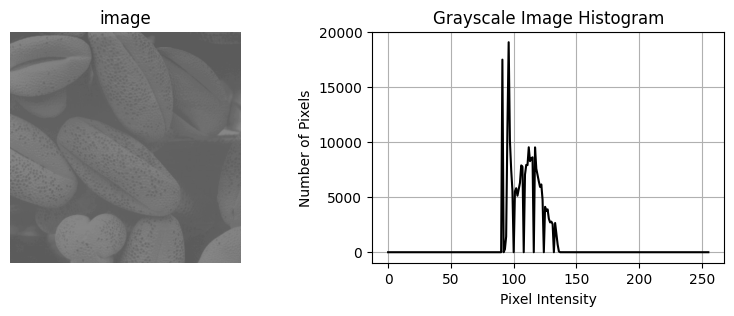

In [ ]:
# LOW CONTRAST IMAGE - before
showHistogram(lowContrast)

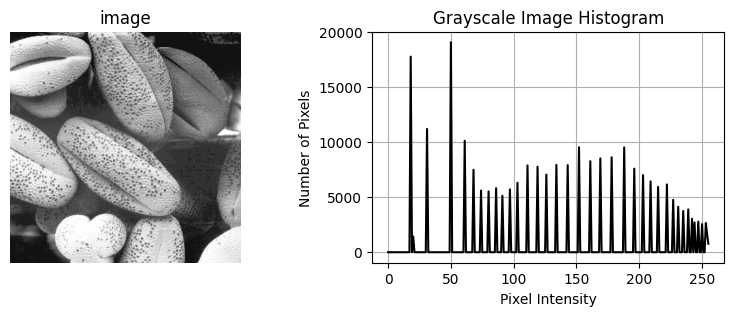

In [ ]:
# LOW CONTRAST IMAGE - after
showHistogram(myHistogramEqualizer(lowContrast,256))

High contrast

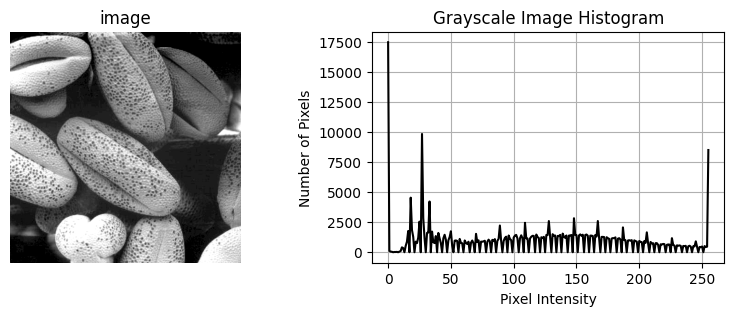

In [ ]:
# HIGH CONTRAST IMAGE - before
showHistogram(highContrast)

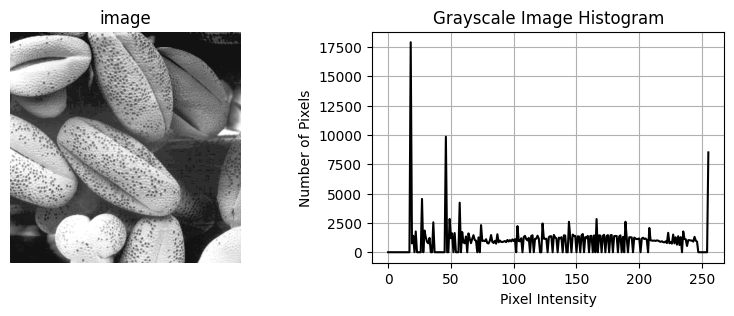

In [ ]:
# HIGH CONTRAST IMAGE - after
showHistogram(myHistogramEqualizer(highContrast,256))

Histogram equalization effectively enhances the contrast of images by redistributing pixel intensity values over the entire available range.

For the **dark image**, the original histogram showed most intensity values clustered toward the lower end, resulting in a dim appearance. After equalization, the intensity values were spread more evenly, brightening the image.

Similarly, the **bright image** initially had intensity values concentrated toward the upper end, which were redistributed across the full range, making it appear less saturated and more balanced.

The **low-contrast image**, characterized by a narrow range of intensity values, demonstrated significant improvement after equalization, with a wider and more even spread that enhanced its contrast.

On the other hand, the **high-contrast image**, which already had a good distribution of intensity values, showed less dramatic changes but still exhibited a slight improvement in the uniformity of its histogram.

Overall, histogram equalization proved effective in enhancing the visual quality of images, particularly for those with poor contrast.